In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


*Loading the Dataset*

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Data Cleaning and Handiling the missing Values**

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
CreditScore,0
Age,0
Tenure,0
...,...
Surname_Zuyev,0
Surname_Zuyeva,0
Geography_Germany,0
Geography_Spain,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Feature Selection and Splitting Data**

In [ ]:
X = df.drop('Exited', axis= 1)
Y = df['Exited']

X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Traning and Evaluation**

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
print("Logistic Regression:")
print("Accuracy:", accuracy_log_reg)
print(classification_report(Y_test, Y_pred_log_reg))
print("confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_log_reg))

Logistic Regression:
Accuracy: 0.781
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000

confusion Matrix:
[[1476  131]
 [ 307   86]]


**Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print(classification_report(Y_test, Y_pred_dt))
print("confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_dt))

Decision Tree:
Accuracy: 0.814
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.53      0.52      0.53       393

    accuracy                           0.81      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000

confusion Matrix:
[[1422  185]
 [ 187  206]]


**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print(classification_report(Y_test, Y_pred_rf))
print("confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))

Random Forest:
Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.35      0.49       393

    accuracy                           0.86      2000
   macro avg       0.85      0.67      0.70      2000
weighted avg       0.86      0.86      0.83      2000

confusion Matrix:
[[1582   25]
 [ 257  136]]


**Support Vector Machine (SVM)**

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print(classification_report(Y_test, Y_pred_svm))
print("confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_svm))

Support Vector Machine (SVM):
Accuracy: 0.7915
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1607
           1       0.21      0.02      0.04       393

    accuracy                           0.79      2000
   macro avg       0.51      0.50      0.46      2000
weighted avg       0.69      0.79      0.72      2000

confusion Matrix:
[[1574   33]
 [ 384    9]]


**Comparing Models and Selecting The Best One**

In [ ]:
model_accuracy = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Support Vector Machine (SVM)": accuracy_svm
}
best_model = max(model_accuracy, key=model_accuracy.get)
print("Best Model:", best_model)
print("Accuracy:", model_accuracy[best_model])

Best Model: Random Forest
Accuracy: 0.859


**Plot**

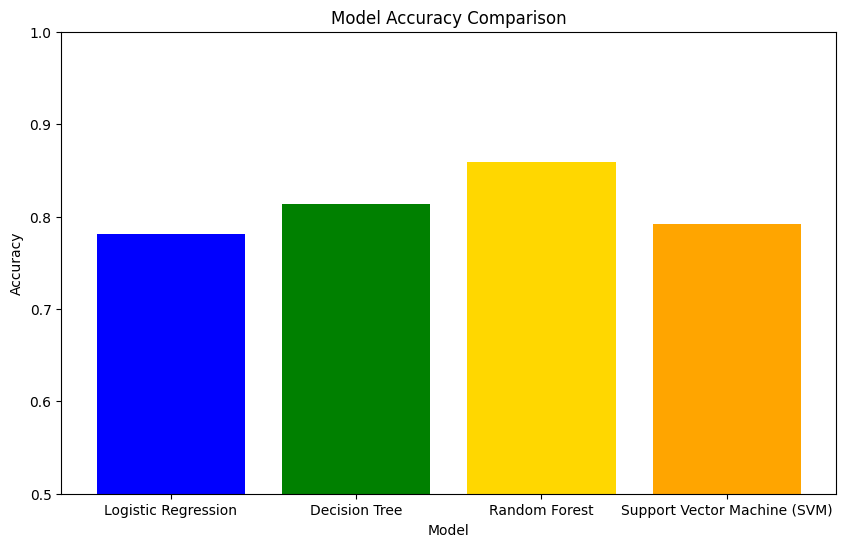


Best Model: Random Forest with Accuracy: 0.859


In [ ]:
# @title Default title text
model_accuracy = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Support Vector Machine (SVM)": accuracy_svm
}

# Creating the Bar Plot

plt.figure(figsize=(10, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=['blue', 'green', 'red', 'orange'])

# Highlight the best model with a different color

best_model = max(model_accuracy, key=model_accuracy.get)
plt.bar(best_model, model_accuracy[best_model], color='gold')

# Adding the Label and Title

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
# Displaying the Plot
plt.show()

# Print the best model's name and accuracy
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracy[best_model]}")
